In [8]:
 #%pip install --no-cache-dir autogluon

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from autogluon.tabular import TabularPredictor
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings("ignore", message="load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")

In [3]:
# Load data (without smote)
X_train = pd.read_pickle('X_train_preprocessed.pkl')
X_test = pd.read_pickle('X_test_preprocessed.pkl')

y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')

In [4]:
# Combine data
train_data = pd.DataFrame(X_train).reset_index(drop=True)
train_data['Y'] = y_train.reset_index(drop=True)
train_data['weight'] = compute_sample_weight('balanced', y_train)

test_data = pd.DataFrame(X_test).reset_index(drop=True)
test_data['Y'] = y_test.reset_index(drop=True)

train_data['Возраст (рассчитывается автоматически)'] = pd.to_numeric(
    train_data['Возраст (рассчитывается автоматически)'], errors='coerce'
)
train_data['count_disease'] = pd.to_numeric(
    train_data['count_disease'], errors='coerce'
)

test_data['Возраст (рассчитывается автоматически)'] = pd.to_numeric(
    test_data['Возраст (рассчитывается автоматически)'], errors='coerce'
)
test_data['count_disease'] = pd.to_numeric(
    test_data['count_disease'], errors='coerce'
)

In [5]:
# TabularPredictor
hp = {
        'num_bag_folds': 0,
        'num_stack_levels': 0,
        'presets': 'medium_quality'  # 'experimental_quality', 'best_quality', 'medium_quality'
    }

predictor = TabularPredictor(label='Y', eval_metric='roc_auc_ovr_weighted', sample_weight='weight').fit(train_data=train_data, **hp)
predictions = predictor.predict(test_data)


No path specified. Models will be saved in: "AutogluonModels/ag-20250517_112521"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.17 GB / 12.67 GB (88.1%)
Disk Space Avail:   67.24 GB / 107.72 GB (62.4%)
Presets specified: ['medium_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Values in column 'weight' used as sample weights instead of predictive features. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/AutogluonModels/ag-202505

In [ ]:
scores = predictor.evaluate(test_data)
print(scores)

{'roc_auc_ovr_weighted': np.float64(0.867007390961812), 'accuracy': 0.7739355954181976, 'balanced_accuracy': np.float64(0.6073459558119524), 'mcc': np.float64(0.4887492462925811)}


In [ ]:
predictor.leaderboard(test_data, extra_metrics=['f1_weighted', 'precision_weighted', 'recall_weighted'], extra_info=True)

,model,score_test,f1_weighted,precision_weighted,recall_weighted,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L2,0.867007,0.772380,0.773622,0.773936,0.876654,roc_auc_ovr_weighted,0.286055,0.132759,60.771551,...,"{'use_orig_features': False, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': 0.77479088306427, 'drop_unique': False}","[NeuralNetFastAI_0, LightGBMLarge_1, LightGBMLarge_2, NeuralNetTorch_1, LightGBMLarge_0, NeuralNetFastAI_2, KNeighborsDist_0, NeuralNetTorch_0, KNeighborsDist_2, NeuralNetTorch_2, NeuralNetFastAI_1, KNeighborsDist_1]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 20},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[NeuralNetFastAI, NeuralNetTorch, LightGBMLarge, KNeighborsDist]",[]
1,NeuralNetTorch,0.865053,0.769293,0.767020,0.776313,0.873562,roc_auc_ovr_weighted,0.042278,0.020549,31.514688,...,"{'num_epochs': 1000, 'epochs_wo_improve': None, 'activation': 'relu', 'embedding_size_factor': 1.0, 'embed_exponent': 0.56, 'max_embedding_dim': 100, 'y_range': None, 'y_range_extend': 0.05, 'dropout_prob': 0.1, 'optimizer': 'adam', 'learning_rate': 0.0003, 'weight_decay': 1e-06, 'proc.embed_min_categories': 4, 'proc.impute_strategy': 'median', 'proc.max_category_levels': 100, 'proc.skew_threshold': 0.99, 'use_ngram_features': False, 'num_layers': 4, 'hidden_size': 128, 'max_batch_size': 512, 'use_batchnorm': False, 'loss_function': 'auto'}","{'batch_size': 128, 'num_epochs': 13}","{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': ['text_ngram', 'text_as_category'], 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None}","[Возраст (рассчитывается автоматически), count_disease, Пол_2, Был ли в заключении ранее_1, Был ли в заключении ранее_2, Был ли в заключении ранее_3, Бытовое пьянство_1, Бытовое пьянство_2, Жилищные условия_1, Жилищные условия_10, Жилищные условия_2, Жилищные условия_3, Жилищные условия_4, Жилищные условия_5, Жилищные условия_8, Инфильтративный туберкулез_1, Инфильтративный туберкулез_3, Инфильтративный туберкулез_4, Инфильтративный туберкулез_5, Инфильтративный туберкулез_6, Распад_1, Распад_2, Фаза туберкулеза органов дыхания_1, Фаза туберкулеза органов дыхания_2, Фаза туберкулеза органо...",None,None,None,None,[],[WeightedEnsemble_L2]
2,LightGBM,0.861201,0.736571,0.792783,0.710612,0.862802,roc_auc_ovr_weighted,0.135784,0.050444,3.924531,...,{'learning_rate': 0.05},{'num_boost_round': 119},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None,

Model: NeuralNetTorch

Classification Report:
                   precision    recall  f1-score   support

Treatment success      0.856     0.884     0.870      3297
   Treatment fail      0.567     0.593     0.580       982
            Death      0.485     0.276     0.352       348

         accuracy                          0.776      4627
        macro avg      0.636     0.584     0.600      4627
     weighted avg      0.767     0.776     0.769      4627



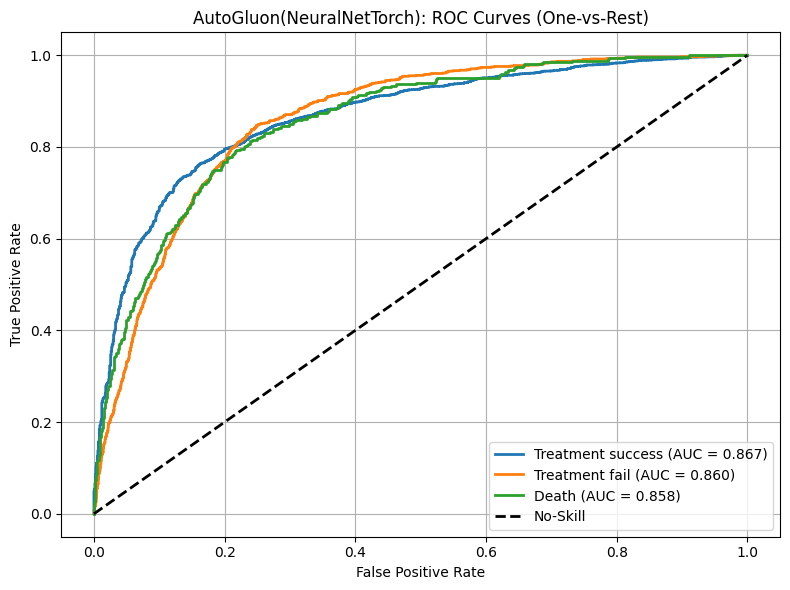

In [19]:
# Load the specific NeuralNetTorch model
choice = 1
model_name = predictor.leaderboard(silent=True).iloc[choice]['model']
model = predictor._trainer.load_model(model_name)

print(f"Model: {model_name}")

# Predict probabilities and classes using the loaded model
y_proba = model.predict_proba(X_test)
y_true = y_test.values.ravel()
y_pred = model.predict(X_test)

# Use predictor.classes_ instead of model.classes_
class_names = ['Treatment success', 'Treatment fail', 'Death']
classes = predictor.classes_
n_classes = len(classes)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

class_auc_roc = {}

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    y_true_binary = (y_true == class_label).astype(int)

    # Extract predicted probabilities for the current class
    if isinstance(y_proba, np.ndarray):
        y_score = y_proba[:, i]
    else:
        y_score = y_proba.iloc[:, i]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true_binary, y_score)

    # Compute AUC
    roc_auc = roc_auc_score(y_true_binary, y_score)
    class_auc_roc[class_names[i]] = round(roc_auc, 4)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2,
             label=f'{class_names[i]} (AUC = {class_auc_roc[class_names[i]]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='No-Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AutoGluon(NeuralNetTorch): ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()